In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = pd.read_csv('iris.csv')
iris.shape

(150, 6)

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.drop('Id', axis = 1, inplace = True)
iris.head()

#dropping the index column

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
iris.describe()

#All four features are numeric, each with different ranges. There are no missing values in any of the columns. 
#Therefore, this is a clean dataset.

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
#The data set contains 3 classes of 50 instances each. We can check this by:
#counting Unique values in the column species 

iris.groupby('Species').size()
 # or
iris['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

The method value_counts() is a great utility for quickly understanding the distribution of the data. When used on the categorical data, it counts the number of unique values in the column of interest.

Iris is a balanced dataset as the data points for each class are evenly distributed.

An example of an imbalanced dataset is fraud. Generally only a small percentage of the total number of transactions is actual fraud, about 1 in 1000. And when the dataset is imbalanced, a slightly different analysis will be used. Therefore, it is important to understand whether the data is balanced or imbalanced.


array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>]], dtype=object)

<Figure size 432x288 with 0 Axes>

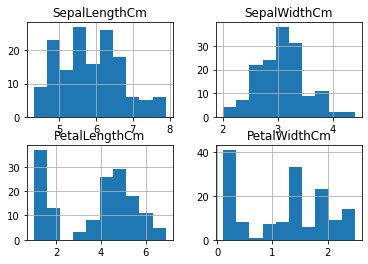

In [7]:
#Univariate Plot

fig = plt.figure()
fig.subplots_adjust(hspace = 0.8, wspace = 0.4)

iris.hist()

This gives us a much clearer idea of the distribution of the input variable, showing that both sepal length and sepal width have a normal (Gaussian) distribution. That is, the distribution has a beautiful symmetric bell shape.

However, the length of petals is not normal. Its plot shows two modes, one peak happening near 0 and the other around 5. Less patterns were observed for the petal width.


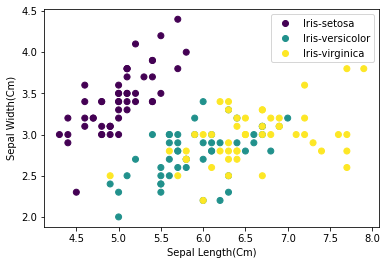

In [8]:
#Multivariate Plots

#building a dictmapping species to an integer code 
inv_name_dict = {'Iris-setosa' : 0,
                 'Iris-versicolor' : 1,
                 'Iris-virginica' : 2}

#building integer color code 0/1/2
colors = [inv_name_dict[item] for item in iris['Species']]

#scatter plot
scatter = plt.scatter(iris['SepalLengthCm'], iris['SepalWidthCm'], c = colors)

plt.xlabel('Sepal Length(Cm)')
plt.ylabel('Sepal Width(Cm)')

#addig a legend
plt.legend(handles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

Using sepal_length and sepal_width features, we can distinguish iris-setosa from others; separating iris-versicolor from iris-virginica is harder because of the overlap as seen by the green and yellow datapoints.

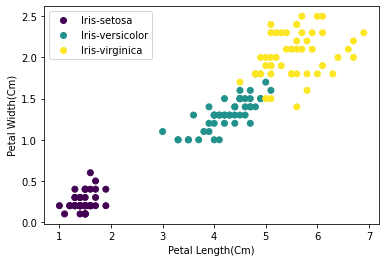

In [9]:
scatter = plt.scatter(iris['PetalLengthCm'], iris['PetalWidthCm'], c = colors)

plt.xlabel('Petal Length(Cm)')
plt.ylabel('Petal Width(Cm)')

plt.legend(handles = scatter.legend_elements()[0], labels = inv_name_dict.keys())
plt.show()

The length and width of the petal are highly correlated, and these two features are very useful to identify various iris species. It is notable that the boundary between iris-versicolor and iris-virginica remains a bit fuzzy, indicating the difficulties for some classifiers.

To see scatter plots of all pairs of features, use pandas.plotting.scatter_matrix(). Besides the histograms of individual variables along the diagonal, it will show the scatter plots of all pairs of attributes to help spot structured relationships between features.

# k nearest neighbors 



K nearest neighbors (knn) is a supervised machine learning model that takes a data point, looks at its 'k' closest labeled data points, and assigns the label by a majority vote.

Here we see that changing k could affect the output of the model. In knn, k is a hyperparameter. A hyperparameter in machine learning is a parameter whose value is set before the learning process begins. We will learn how to tune the hyperparameter later.

In scikit-learn, the k nearest neighbors algorithm is implemented in 

 *sklearn.neighbors module:

from sklearn.neighbors import KNeighborsClassifier
K nearest neighbors can also be used for regression problems. The difference lies in prediction. Instead of a majority vote, knn for regression makes a prediction using the mean labels of the k closest data points.

In [10]:
'''The length and the width of the petals are the most useful features to separate the species as seen earlier'''
# we build a model using those features 

X = iris[['PetalLengthCm', 'PetalWidthCm']]
Y = iris['Species']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1, stratify = Y)

In classifications, stratified sampling is often chosen to ensure that the train and test sets have approximately the same percentage of samples of each target class as the complete set i.e  to make sure that the distribution of labels remains similar in both train and test sets.

In [11]:
Y_train.value_counts()

Iris-virginica     35
Iris-setosa        35
Iris-versicolor    35
Name: Species, dtype: int64

In [12]:
Y_test.value_counts()

Iris-virginica     15
Iris-setosa        15
Iris-versicolor    15
Name: Species, dtype: int64

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)

knn.fit(X_train, Y_train)

KNeighborsClassifier()

We use most the default values for the parameters, e.g., metric = 'minkowski' and p = 2 together defines that the distance is euclidean distance.

In [14]:
pred = knn.predict(X_test)
pred[:5]

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor'], dtype=object)

In [15]:
y_pred_prob = knn.predict_proba(X_test)
y_pred_prob[10:12]

array([[1. , 0. , 0. ],
       [0. , 0.2, 0.8]])

Of all classification algorithms implemented in scikit learn, there is an additional method 'predict_prob'. Instead of splitting the label, it outputs the probability for the target in array form

For example, the probability of the 11th flower being predicted an iris-setosa is 1, an iris-versicolor and an iris-virginica are both 0. 

For the next flower, there is a 20% chance that it would be classified as iris-versicolor but 80% chance to be iris-virginica. What it tells us is that of the five nearest neighbours of the 12th flower in the testing set, 1 is an iris-versicolor, the rest 4 are iris-virginica.

In [16]:
#To see the corresponding predictions:

pred[10:12]

array(['Iris-setosa', 'Iris-virginica'], dtype=object)

In classification tasks, 

* Soft prediction returns the predicted probabilities of data points belonging to each of the classes while 
* Hard prediction outputs the labels only.

In [17]:
# Model Evaluation

(pred == Y_test.values).sum()

44

In [18]:
print(Y_test.size)

45



In classification the most straightforward metric is accuracy. It calculates the proportion of data points whose predicted labels exactly match the observed labels.

The classifier made one mistake. Thus, the accuracy is 44/45 = 
   0.9777

In [19]:
#Same as 

knn.score(X_test, Y_test)

#Under the module sklearn.metrics, function accuracy_score(y_true, y_pred) does the same calculation

0.9777777777777777

Classification accuracy alone can be misleading if there is an unequal number of observations in each class or if there are more than two classes in the dataset. Calculating a confusion matrix will provide a better idea of what the classification is getting right and what types of errors it is making.

What is a confusion matrix? It is a summary of the counts of correct and incorrect predictions, broken down by each class.

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred, labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 14]], dtype=int64)

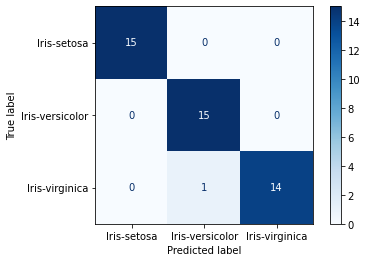

In [21]:
#visualizing the confusion matrix:

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn, X_test, Y_test, cmap = plt.cm.Blues)

Here we specified the labels in order. Each column of the matrix corresponds to a predicted class, and each row corresponds to an actual class. So the row sums up to the total number of instances of the class.

The first row corresponds to the actual iris-setosa; [15, 0, 0] indicates that 15 of iris-setosa are correctly predicted, and none are mislabeled; 

while the last row [0, 1, 14] suggests that of 15 actual iris-virginica, 0 were predicted as iris-setosa, 1 was predicted to be iris-versicolor, and the remaining 14 were correctly identified as iris-virginica. 

This is consistent with our observation during exploratory data analysis, that is, there was some overlap between the two species on the scatter plot and it is more difficult to distinguish iris-versicolor from iris-virginica than identifying iris-setosa.


# K-fold Cross Validation


Previously we made train-test split before fitting the model so that we can report the model performance on the test data. This is a simple kind of cross validation technique, also known as the holdout method. However, the split is random, as a result, model performance can be sensitive to how the data is split. To overcome this, we introduce k-fold cross validation.

In k fold cross validation, the data is divided into k subsets. Then the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set and the other k-1 subsets are combined to train the model. Then the accuracy is averaged over k trials to provide total effectiveness of the model. In this way, all data points are used; and there are more metrics so we don’t rely on one test data for model performance evaluation.


The simplest way to use k-fold cross-validation in scikit-learn is to call the cross_val_score function on the model and the dataset

In [22]:
from sklearn.model_selection import cross_val_score

#creating a new knn model
knn_cv = KNeighborsClassifier(n_neighbors = 3)

#fitting a 3nn model
cv_scores = cross_val_score(knn_cv, X, Y, cv = 5)

'''Each of the holdout set contains 20% of the original data'''
#printing each cv score (accuracy)
print(cv_scores)

[0.96666667 0.96666667 0.9        0.93333333 1.        ]


As shown, due to the random assignments, the accuracies on the holdsets fluctuates from 0.9 to 1.

We can not rely on one single train-test split, rather we report that the 3nn model has an accuracy of 95.33% based on a 5-fold cross validation.

In [23]:
cv_scores.mean()

0.9533333333333334

As a general rule, 5-fold or 10-fold cross validation is preferred; but there is no formal rule. As k gets larger, the difference in size between the training set and the resampling subsets gets smaller. As this difference decreases, the bias of the technique becomes smaller.

# Grid Search

When we built our first knn model, we set the hyperparameter k to 5, and then to 3 later in k-fold cross validation; random choices really. 

What is the best k? Finding the optimal k is called tuning the hyperparameter. A handy tool is grid search. In scikit-learn, we use GridSearchCV, which trains our model multiple times on a range of values specified with the param_grid parameter and computes cross validation score, so that we can check which of our values for the tested hyperparameter performed the best.

In [58]:
from sklearn.model_selection import GridSearchCV

#a new knn model
knn2 = KNeighborsClassifier()

#creating a dict of values we want to test for n_neighbors
param_grid = {'n_neighbors':np.arange(2,10)}

#use grid search to test all values for n_neighbors 
knn_gscv = GridSearchCV(knn2, param_grid, cv = 5)

#fit model to the data
knn_gscv.fit(X,Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [59]:
#To check the top performing n_neighbors value:
knn_gscv.best_params_

{'n_neighbors': 4}

We can see that 4 is the best value for n_neighbors. What is the accuracy of the model when k is 4?

In [60]:
knn_gscv.best_score_

0.9666666666666668

By using grid search to find the optimal hyperparameter for our model, it improves the model accuracy by over 1%.

Now we are ready to build the final model:

In [61]:
knn_final = KNeighborsClassifier(n_neighbors =  knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X, Y)
y_pred = knn_final.predict(X)
knn_final.score(X, Y)

0.9733333333333334

We can report that our final model, 4nn, has an accuracy of 97.3% in predicting the species of iris!

The techniques of k-fold cross validation and tuning parameters with grid search is applicable to both classification and regression problems.

In [35]:
new_data = np.array([[3.76, 1.2]])
knn_final.predict(new_data)

array(['Iris-versicolor'], dtype=object)

In [37]:
knn_final.predict([[3.76, 1.2]])

array(['Iris-versicolor'], dtype=object)

In [39]:
new_data1 = np.array([[3.76, 1.2], [5.25, 1.2], [1.58, 1.2]])
knn_final.predict(new_data1)

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa'], dtype=object)

In [42]:
knn_final.predict_proba(new_data1)

array([[0.  , 1.  , 0.  ],
       [0.  , 0.25, 0.75],
       [1.  , 0.  , 0.  ]])